<a href="https://colab.research.google.com/github/varaprasad1103/Credit_card_fraud_detection/blob/main/CredtcardDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import files
uploaded = files.upload()

Saving cdd.zip to cdd (2).zip


In [35]:
import zipfile
zip_file_path = 'cdd.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
import os
os.listdir('/content/')


['.config',
 'archive.zip',
 'cdd (2).zip',
 'cdd (1).zip',
 'cdd.zip',
 'cdd.csv',
 'sample_data']

In [36]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.0 MB/s eta 0:00:00


----- Logistic Regression Evaluation -----
Accuracy: 0.925
Confusion Matrix:
 [[17  2]
 [ 1 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.91      0.95      0.93        21

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40

ROC-AUC Score: 0.9147869674185464


----- Random Forest Evaluation -----
Accuracy: 0.975
Confusion Matrix:
 [[18  1]
 [ 0 21]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

ROC-AUC Score: 1.0




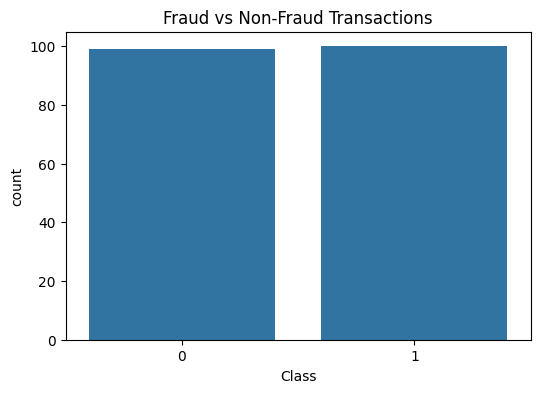

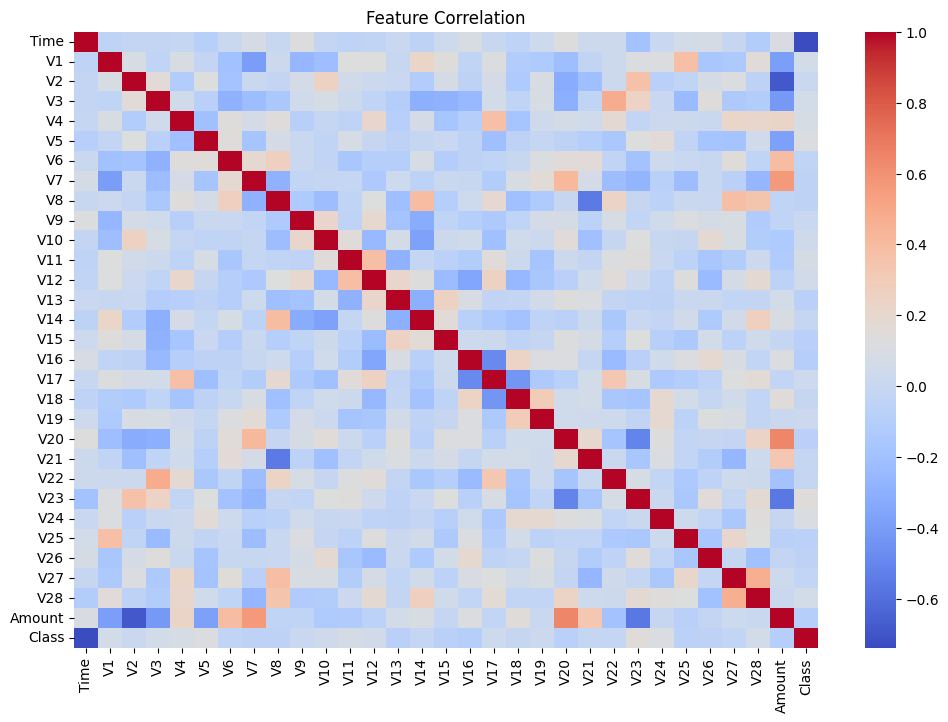

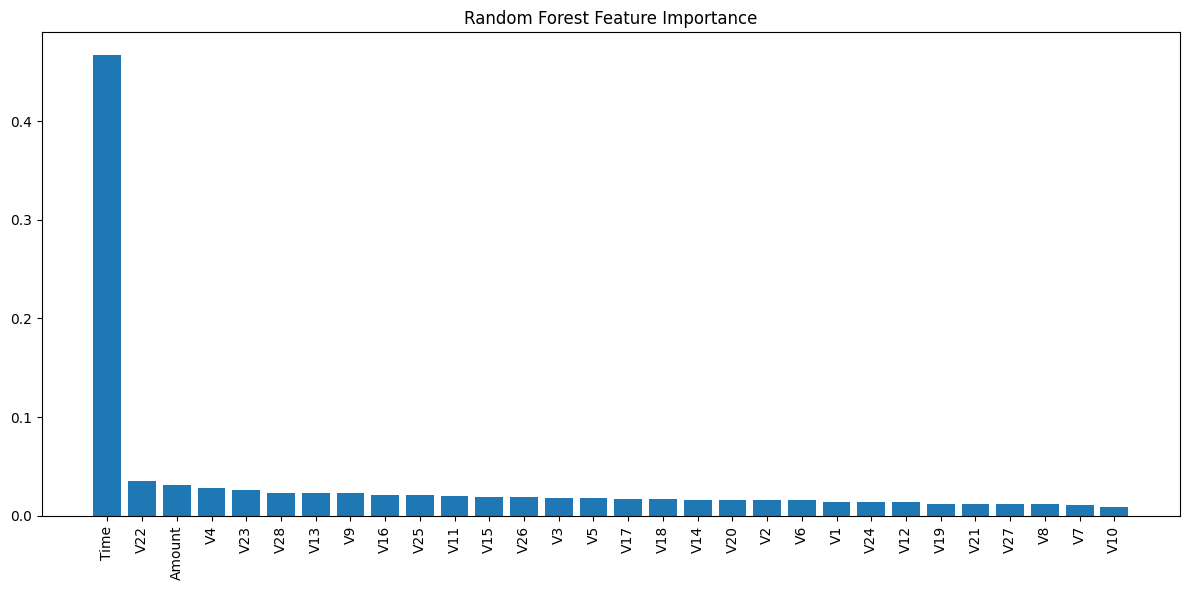

Prediction: Legitimate
Probability of Fraud: 0.2200


Saving archive.zip to archive (1).zip


,Prediction,Fraud Probability
0,Fraud,0.90
1,Fraud,0.90
2,Fraud,0.87
3,Legitimate,0.17
4,Fraud,0.88


In [37]:
# ----------------------------
# Credit Card Fraud Detection - Interactive in Jupyter/Colab
# ----------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset
df = pd.read_csv("cdd.csv")

# Features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# Train Models
# ----------------------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# ----------------------------
# Evaluation
# ----------------------------
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    print(f"----- {name} Evaluation -----")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    print("\n")

evaluate_model(log_model, X_test, y_test, "Logistic Regression")
evaluate_model(rf_model, pd.DataFrame(X_test, columns=X_train.columns), y_test, "Random Forest")

# ----------------------------
# Visualizations
# ----------------------------
# Fraud vs Non-Fraud distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation')
plt.show()

# Feature importance (Random Forest)
importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Random Forest Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.show()

# ----------------------------
# Prediction Function
# ----------------------------
def predict_fraud(transaction, model='rf'):
    df_trans = pd.DataFrame([transaction])
    df_trans = df_trans[X_train.columns]

    if model == 'rf':
        pred = rf_model.predict(df_trans)[0]
        prob = rf_model.predict_proba(df_trans)[0][1]
    else:
        pred = log_model.predict(df_trans)[0]
        prob = log_model.predict_proba(df_trans)[0][1]

    return pred, prob

# ----------------------------
# Example Prediction
# ----------------------------
sample_transaction = {col: 0 for col in X_train.columns}
sample_transaction['Time'] = 10000
sample_transaction['Amount'] = 149.62
sample_transaction['V1'] = -1.3598071336738
sample_transaction['V2'] = -0.0727811733098497
sample_transaction['V3'] = 2.53634673796914

prediction, probability = predict_fraud(sample_transaction, model='rf')
print(f"Prediction: {'Fraud' if prediction==1 else 'Legitimate'}")
print(f"Probability of Fraud: {probability:.4f}")

# ----------------------------
# Optional: Upload CSV for batch prediction
# ----------------------------
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    data = pd.read_csv(fn)
    data = data[X_train.columns]
    preds = rf_model.predict(data)
    probs = rf_model.predict_proba(data)[:,1]
    results = pd.DataFrame({
        "Prediction": ["Fraud" if x==1 else "Legitimate" for x in preds],
        "Fraud Probability": probs
    })
    display(results.head())
